In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
% matplotlib inline
data_dir="E:\Work\Python\PythonTrainings\PythonForModellers\Data"
os.chdir(data_dir)

In [3]:
data=pd.read_csv("dm.csv")

In [4]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


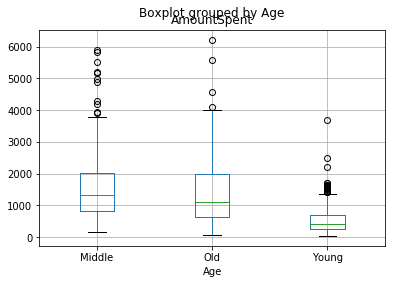

In [5]:
## Explore data
data.boxplot(by="Age",column="AmountSpent")

In [6]:
data["Age"]=data["Age"].map(lambda x: "Middle-Old" if x!="Young" else "Young")

In [8]:
data["Age"].unique()

array(['Middle-Old', 'Young'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


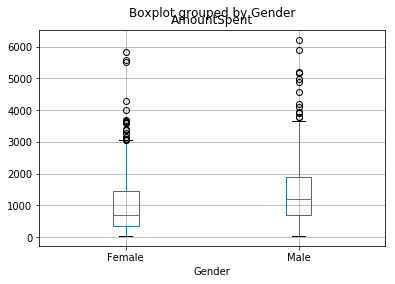

In [9]:
## Gender
data.boxplot(by="Gender",column="AmountSpent")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


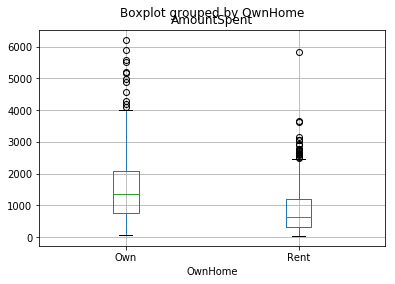

In [10]:
##
data.boxplot(by="OwnHome",column="AmountSpent")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


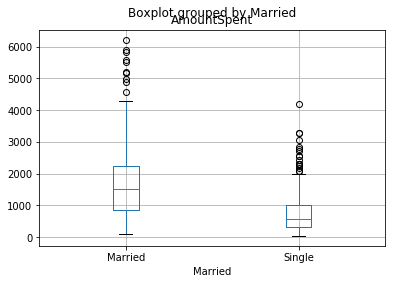

In [11]:
##
data.boxplot(by="Married",column="AmountSpent")

In [12]:
data["History"].isnull().sum()

303

In [14]:
data["History"].fillna("NewCustomer",inplace=True)

In [15]:
data["History"].unique()

array(['High', 'Low', 'Medium', 'NewCustomer'], dtype=object)

In [16]:
data["Children"]=data["Children"].map(lambda x: "0-1" if x<=1 else "2-3")

In [18]:
###
train=data.sample(frac=0.7,random_state=200)

In [19]:
test=data.drop(train.index)

In [20]:
train.shape

(700, 11)

In [21]:
test.shape

(300, 11)

In [22]:
import statsmodels.formula.api as smf
from patsy import dmatrices

In [23]:
## Model
model1=smf.ols("AmountSpent~Salary",data=train).fit()

In [25]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     674.9
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          1.26e-104
Time:                        12:04:09   Log-Likelihood:                -5573.2
No. Observations:                 700   AIC:                         1.115e+04
Df Residuals:                     698   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.2096     55.904     -1.131      0.2

In [27]:
model2=smf.ols("AmountSpent~C(Age)+C(Gender)+Salary",data=train).fit()

In [26]:
train.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children       object
History        object
Catalogs        int64
AmountSpent     int64
Cust_Id         int64
dtype: object

In [28]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     224.6
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          6.77e-102
Time:                        12:13:08   Log-Likelihood:                -5573.0
No. Observations:                 700   AIC:                         1.115e+04
Df Residuals:                     696   BIC:                         1.117e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -68.2724     79.71

In [29]:
l=['1','2','3']

In [30]:
"+".join(l)

'1+2+3'

In [31]:
"+".join(train.columns)

'Age+Gender+OwnHome+Married+Location+Salary+Children+History+Catalogs+AmountSpent+Cust_Id'

In [34]:
model3=smf.ols('''AmountSpent~C(Age)+C(Gender)+C(OwnHome)+C(Married)+
                 C(Location)+Salary+Children+C(History)+Catalogs''',data=train).fit()

In [32]:
train.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children       object
History        object
Catalogs        int64
AmountSpent     int64
Cust_Id         int64
dtype: object

In [35]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     187.8
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          9.16e-199
Time:                        12:19:41   Log-Likelihood:                -5324.6
No. Observations:                 700   AIC:                         1.067e+04
Df Residuals:                     688   BIC:                         1.073e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [37]:
## create dummies
train["Low"]=train["History"].map(lambda x: 1 if x=="Low" else 0)
test["Low"]=test["History"].map(lambda x: 1 if x=="Low" else 0)
train["Medium"]=train["History"].map(lambda x: 1 if x=="Medium" else 0)
test["Medium"]=test["History"].map(lambda x: 1 if x=="Medium" else 0)

In [36]:
train.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
674,Middle-Old,Female,Own,Married,Close,85500,2-3,Medium,18,895,605
233,Middle-Old,Female,Own,Married,Close,74400,0-1,High,18,2479,704
739,Middle-Old,Male,Rent,Single,Close,45900,0-1,Medium,12,716,293
865,Middle-Old,Male,Own,Married,Close,96100,0-1,High,6,1588,744
523,Middle-Old,Female,Rent,Married,Far,72200,0-1,High,24,3069,1198


In [44]:
formula="AmountSpent~Salary+C(Children)+Low+Medium+C(Location)+Catalogs"

In [45]:
model5=smf.ols(formula,data=train).fit()

In [46]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     344.0
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          5.39e-204
Time:                        12:32:53   Log-Likelihood:                -5326.6
No. Observations:                 700   AIC:                         1.067e+04
Df Residuals:                     693   BIC:                         1.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -274.3651     68

In [47]:
fitted=model5.fittedvalues

In [48]:
residuals=model5.resid

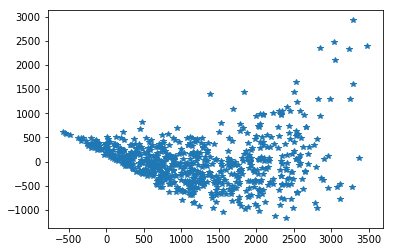

In [49]:
plt.plot(fitted,residuals,"*")

In [50]:
## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
a,b=2,3

In [52]:
a

2

In [53]:
b

3

In [54]:
y,X=dmatrices(formula,data=train,return_type="dataframe")

In [55]:
X.head()

,Intercept,C(Children)[T.2-3],C(Location)[T.Far],Salary,Low,Medium,Catalogs
674,1.0,1.0,0.0,85500.0,0.0,1.0,18.0
233,1.0,0.0,0.0,74400.0,0.0,0.0,18.0
739,1.0,0.0,0.0,45900.0,0.0,1.0,12.0
865,1.0,0.0,0.0,96100.0,0.0,0.0,6.0
523,1.0,0.0,1.0,72200.0,0.0,0.0,24.0


In [56]:
?variance_inflation_factor

In [57]:
variance_inflation_factor(X.values,0)

13.637746746632624

In [61]:
[variance_inflation_factor(X.values,i) for i in np.arange(0,X.shape[1])]

[13.637746746632624,
 1.1354072234763262,
 1.0553997877471069,
 1.3475587046972117,
 1.6396466054099559,
 1.1744940048013284,
 1.0568555459852746]

In [58]:
X.columns

Index(['Intercept', 'C(Children)[T.2-3]', 'C(Location)[T.Far]', 'Salary',
       'Low', 'Medium', 'Catalogs'],
      dtype='object')

In [60]:
np.arange(0,X.shape[1])

array([0, 1, 2, 3, 4, 5, 6])

In [63]:
vif=pd.DataFrame()

In [64]:
vif['VIF VALUES']=[variance_inflation_factor(X.values,i) for i in np.arange(0,X.shape[1])]

In [65]:
vif["Feature Name"]=X.columns

In [66]:
vif

,VIF VALUES,Feature Name
0,13.637747,Intercept
1,1.135407,C(Children)[T.2-3]
2,1.055400,C(Location)[T.Far]
3,1.347559,Salary
4,1.639647,Low
5,1.174494,Medium
6,1.056856,Catalogs


In [67]:
model6=smf.ols("np.log(AmountSpent)~Salary+C(Children)+Low+Medium+C(Location)+Catalogs",data=train).fit()

In [68]:
print(model6.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.839
Model:                             OLS   Adj. R-squared:                  0.838
Method:                  Least Squares   F-statistic:                     602.1
Date:                 Fri, 08 Dec 2017   Prob (F-statistic):          5.62e-271
Time:                         12:49:01   Log-Likelihood:                -259.93
No. Observations:                  700   AIC:                             533.9
Df Residuals:                      693   BIC:                             565.7
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.5

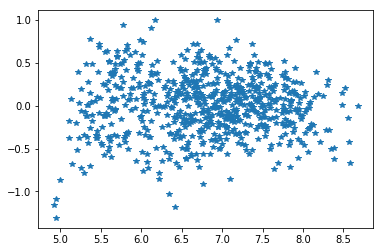

In [70]:
plt.plot(model6.fittedvalues,model6.resid,"*")

In [71]:
model6.params

Intercept             5.568378
C(Children)[T.2-3]   -0.386804
C(Location)[T.Far]    0.295889
Salary                0.000015
Low                  -0.696315
Medium               -0.164749
Catalogs              0.038363
dtype: float64